<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/DeepCV/0210_Limit_of_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import sys
import tensorflow as tf
import numpy as np

# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)

# Training loss 확인하기
loss = history.history['loss']

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1000, 784))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - categorical_accuracy: 0.6517 - loss: 27.3707 - val_categorical_accuracy: 0.9232 - val_loss: 1.3575
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - categorical_accuracy: 0.9325 - loss: 1.0051 - val_categorical_accuracy: 0.9398 - val_loss: 0.7598
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - categorical_accuracy: 0.9582 - loss: 0.3961 - val_categorical_accuracy: 0.9463 - val_loss: 0.6054
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - categorical_accuracy: 0.9735 - loss: 0.1877 - val_categorical_accuracy: 0.9485 - val_loss: 0.5790
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - categorical_accuracy: 0.9837 - loss: 0.0928 - val_categorical_accuracy: 0.9492 - val_loss: 0.5448
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - categorical_accuracy: 0.9902 - loss: 0.0433 - val_categorical_accuracy: 0.9508 - val_loss: 0.5257
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - categorical_accuracy: 0.9946 - loss: 0.0214 - val_

In [13]:
# OpenCV 모듈 불러오기
import cv2

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 확인
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

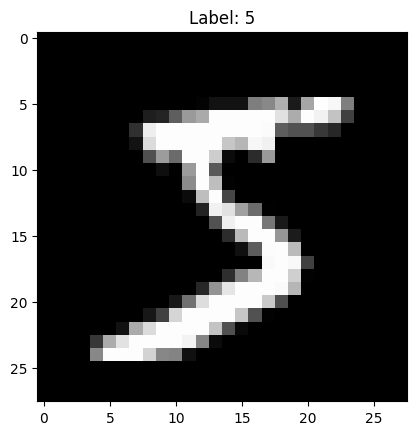

In [15]:
import matplotlib.pyplot as plt

# 첫 번째 훈련 데이터 이미지를 확인
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

In [16]:
# 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(x_train[5], M, (28, 28))  ## image에 matrix 곱

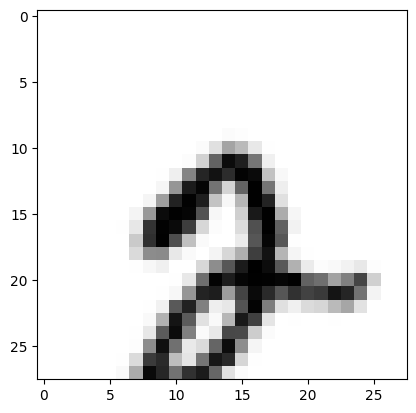

In [17]:
plt.imshow(test_image, cmap='Greys')

In [18]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [19]:
Y_prediction = model.predict(test_image_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 784))
  warnings.warn(msg)


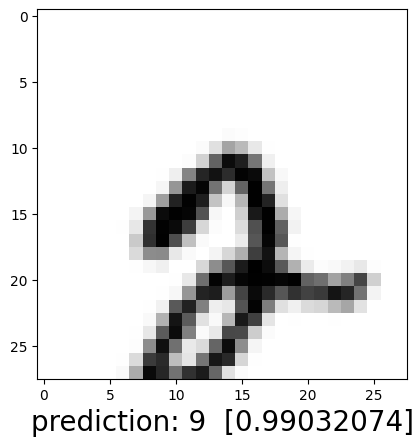

In [20]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()